In [5]:
#Importing imp packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

In [6]:
#Reading of data and previewing it
train_file_path= r'D:\Studies\Fourth Semester\Autonomous Systems A\Truck-Platooning-Simulation-CARLA\Machine Learning\Mohamed Amer - Random Forest Classifier\KDD1999 CUP data/Train_data.csv'

X = pd.read_csv(train_file_path)

print(X.iloc[:0])


Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, class]
Index: []


In [7]:
#Manually analysing the data
print(X.describe())


           duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  25192.00000  25192.000000       25192.000000  25192.000000   
mean       0.00004      0.198039           0.001191      0.394768   
std        0.00630      2.154202           0.045418      0.4888

In [8]:
always_zero_features= ['num_outbound_cmds', 'is_host_login']

In [9]:
#check dataset distribution and null values
X.drop(always_zero_features, axis=1, inplace=True)
print(X['class'].value_counts())
print(X.isnull().sum())



normal     13449
anomaly    11743
Name: class, dtype: int64
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_ra

In [10]:
#removing categorical columns for first model training
y= X['class']
X.drop('class', axis=1, inplace=True)
columns_to_drop = [
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate'
]

X.drop(columns=columns_to_drop, axis=1, inplace=True)

In [11]:

categorical_cols=X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['protocol_type', 'service', 'flag'], dtype='object')


In [12]:
#Hot endcoding categorical features
encoder = OneHotEncoder(sparse=False) 
encoded_categories = encoder.fit_transform(X[['protocol_type', 'service','flag']])


encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['protocol_type', 'service','flag']))

X_copy = X.copy()

# Drop the columns and concatenate
X_copy.drop(columns=['protocol_type', 'service', 'flag'], inplace=True)
X_full = pd.concat([X_copy, encoded_df], axis=1)




In [13]:

print(X_full.columns)





Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=107)


In [14]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded= pd.DataFrame(y_encoded, index=y.index, columns=['class'])

In [15]:
#Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_encoded, train_size=0.8, test_size=0.2,
                                                      random_state=0)





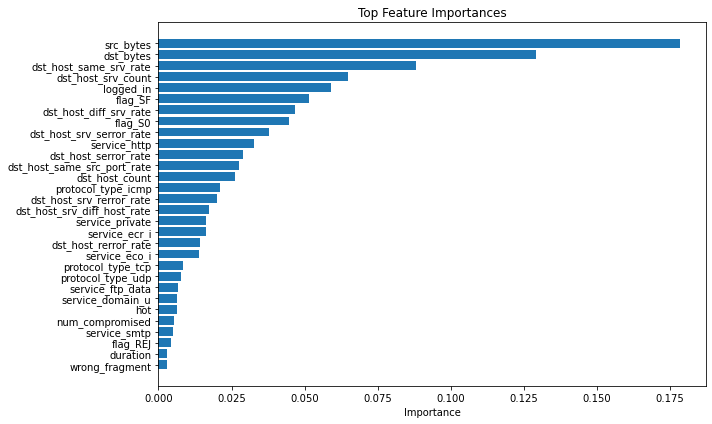

In [16]:

rf = RandomForestClassifier(
    n_estimators=100,         
    max_depth=10,              
    min_samples_split=10,      
    min_samples_leaf=5,        
    max_features='sqrt',      
    random_state=42
)
rf.fit(X_train, y_train.values.ravel())

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns


feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})


feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)

top_n = 30
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
plt.barh(feature_importance_df['feature'][:top_n][::-1], feature_importance_df['importance'][:top_n][::-1])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



In [17]:

#Getting Model accuracy
y_pred_pretest = rf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_pretest)
print(classification_report(y_valid, y_pred_pretest))
print(f"Model accuracy: {accuracy:.2f}")



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2326
           1       0.99      1.00      0.99      2713

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039

Model accuracy: 0.99


<AxesSubplot:xlabel='class', ylabel='src_bytes'>

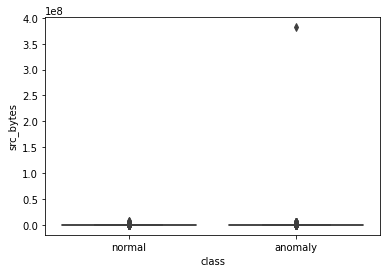

In [18]:
#dropping the least important features

threshold = 0.01
important_features = feature_importance_df[feature_importance_df['importance'] > threshold]['feature']
X_reduced = X_full[important_features]


#Finding correlation of Src_bytes with the target variable
import seaborn as sns
sns.boxplot(x=y, y=X['src_bytes'])


In [19]:
X_reduced.shape

(25192, 20)

In [20]:
# Experimenting with Variables (will be optimized later)
X_train, X_valid, y_train, y_valid = train_test_split(X_reduced, y_encoded, train_size=0.8, test_size=0.2,
                                                      random_state=0)

model_1 = RandomForestClassifier(
    n_estimators=100,        
    max_depth=10,             
    min_samples_split=10,     
    min_samples_leaf=5,       
    max_features='sqrt',   
    random_state=42
)
print(X_train.columns)
print(X_train.shape)

Index(['src_bytes', 'dst_bytes', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'logged_in', 'flag_SF', 'dst_host_diff_srv_rate',
       'flag_S0', 'dst_host_srv_serror_rate', 'service_http',
       'dst_host_serror_rate', 'dst_host_same_src_port_rate', 'dst_host_count',
       'protocol_type_icmp', 'dst_host_srv_rerror_rate',
       'dst_host_srv_diff_host_rate', 'service_private', 'service_ecr_i',
       'dst_host_rerror_rate', 'service_eco_i'],
      dtype='object')
(20153, 20)


In [21]:
model_1.fit(X_train, y_train.values.ravel())    
preds = model_1.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, preds))
print(classification_report(y_valid, preds))


scores = cross_val_score(model_1, X_reduced, y, cv=10)
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")
print(scores)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_valid, preds))


Accuracy: 0.9938479857114507
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2326
           1       0.99      1.00      0.99      2713

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039

Mean accuracy: 0.9954350586337487
Standard deviation: 0.000818306091311361
[0.99444444 0.99642857 0.9952362  0.99603017 0.99364827 0.9952362
 0.9952362  0.99603017 0.99603017 0.99603017]
[[2303   23]
 [   8 2705]]


In [22]:
X_with_target = pd.concat([X_train, y_train], axis=1)

# Calculate and print the correlation with the target 
correlation_matrix = X_with_target.corr()
print(correlation_matrix['class'])

src_bytes                     -0.006548
dst_bytes                      0.012021
dst_host_same_srv_rate         0.691323
dst_host_srv_count             0.717398
logged_in                      0.687917
flag_SF                        0.756402
dst_host_diff_srv_rate        -0.235283
flag_S0                       -0.649822
dst_host_srv_serror_rate      -0.652926
service_http                   0.558454
dst_host_serror_rate          -0.649929
dst_host_same_src_port_rate   -0.092096
dst_host_count                -0.367148
protocol_type_icmp            -0.199520
dst_host_srv_rerror_rate      -0.257336
dst_host_srv_diff_host_rate   -0.066281
service_private               -0.446260
service_ecr_i                 -0.148029
dst_host_rerror_rate          -0.257498
service_eco_i                 -0.167943
class                          1.000000
Name: class, dtype: float64


In [23]:


def plot_train_val_accuracy(y_train_true, y_train_pred, y_val_true, y_val_pred, model_name="Your Model"):
    
    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    val_accuracy = accuracy_score(y_val_true, y_val_pred)

    labels = ['Training Accuracy', 'Validation Accuracy']
    accuracies = [train_accuracy, val_accuracy]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, accuracies, color=['skyblue', 'lightcoral'])
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Training vs. Validation Accuracy')
    plt.ylim(0, 1.05) # Accuracy is between 0 and 1, add a little buffer
    plt.axhline(y=train_accuracy, color='blue', linestyle='--', linewidth=0.8, label=f'Train: {train_accuracy:.4f}')
    plt.axhline(y=val_accuracy, color='red', linestyle='--', linewidth=0.8, label=f'Val: {val_accuracy:.4f}')
    plt.legend()
    plt.show()

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")

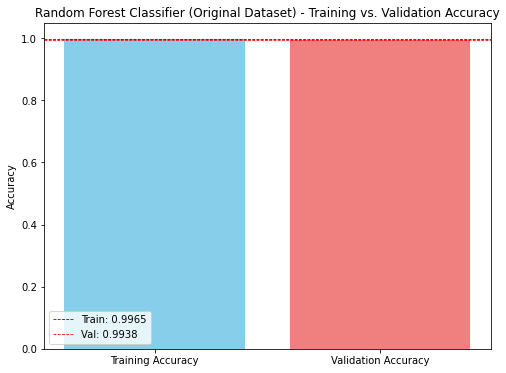

Training Accuracy: 0.9965
Validation Accuracy: 0.9938


In [24]:
y_train_preds = model_1.predict(X_train)
plot_train_val_accuracy(y_train, y_train_preds, y_valid, preds, model_name="Random Forest Classifier (Original Dataset)")

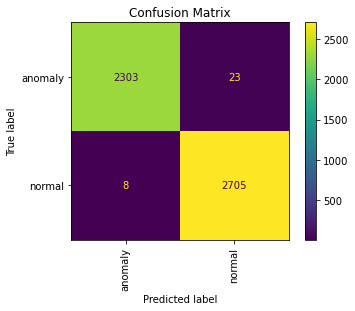

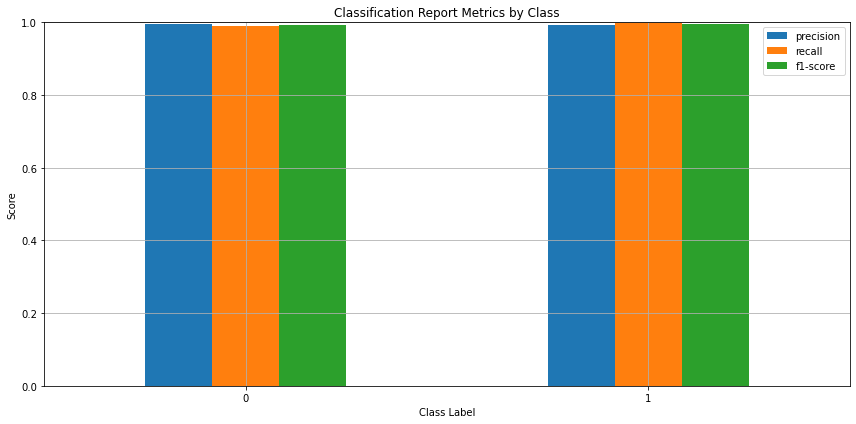

In [25]:
# %%
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_valid, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()

# Get classification report as dictionary
report_dict = classification_report(y_valid, preds, output_dict=True)

# Convert to DataFrame for visualization
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'])

# Plot precision, recall, f1-score for each class
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
plt.title("Classification Report Metrics by Class")
plt.ylabel("Score")
plt.xlabel("Class Label")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()
